In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import transition
import angle
import hamiltonian

# The Hamiltonian
The Hamiltonian is :

$$ H_S = D_{1} (S_{z,1}^2 -\frac{1}{3} S(S+1) )
+E_{1} [(S_{x,1})^2-(S_{y,1})^2]–g \mu_{B} \vec H  \cdot \vec S_{1} $$

We will define the Hamiltonian through the ladder operators:
$$ S_+ |S, m \rangle = \hbar \sqrt{S(S+1) - m (m+1)} \; | S m+1 \rangle $$
and
$$ S_- |S, m+1 \rangle = \hbar \sqrt{S(S+1) - m (m+1)} \;  | S m \rangle $$

Then,
$$ S_x= \frac{1}{2} ( S_+ + S_-) $$
and
$$ S_y= \frac{-i}{2} ( S_+ - S_-) $$

Finally,

$$ S_z |S, m \rangle = \hbar m  \; | S m \rangle $$

We also define the external field :

$$
H_{\rm ext} = \cos (\theta) ( S_{z,1}) 
+
\cos (\theta)
\Big 
(
\cos (\phi) ( S_{x,1}  ) 
+
\sin (\phi) ( S_{y,1} ) 
\Big )
$$



In [9]:
# parameters
S = 7/2

D1= 1.281 
E1 = 0.294
A = np.diag([E1, -E1, D1]) # anisotropy matrix (units of GHz)
g = 2.0
μb = 13.99
g = g*μb*np.eye(3) # g-tensor (units of GHz / T)

th = 0.001 # T2 threshold, 1.0 MHz (corresponding to 1 μs)

h_ext = 0.001 # 1 mT
θ = np.pi / 2
ϕ = 0.0
h_ext = -h_ext * np.array([np.sin(θ)*np.cos(ϕ), np.sin(θ)*np.sin(ϕ), np.cos(θ)]) # intrinsic field vector

shift = -D1 * 1/3 * S*(S + 1) # energy shift

/var/folders/7d/l4q4nb_s0qxdqtn988wwhp6h0000gn/T/ipykernel_73804/1612645669.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(ticks_labels)


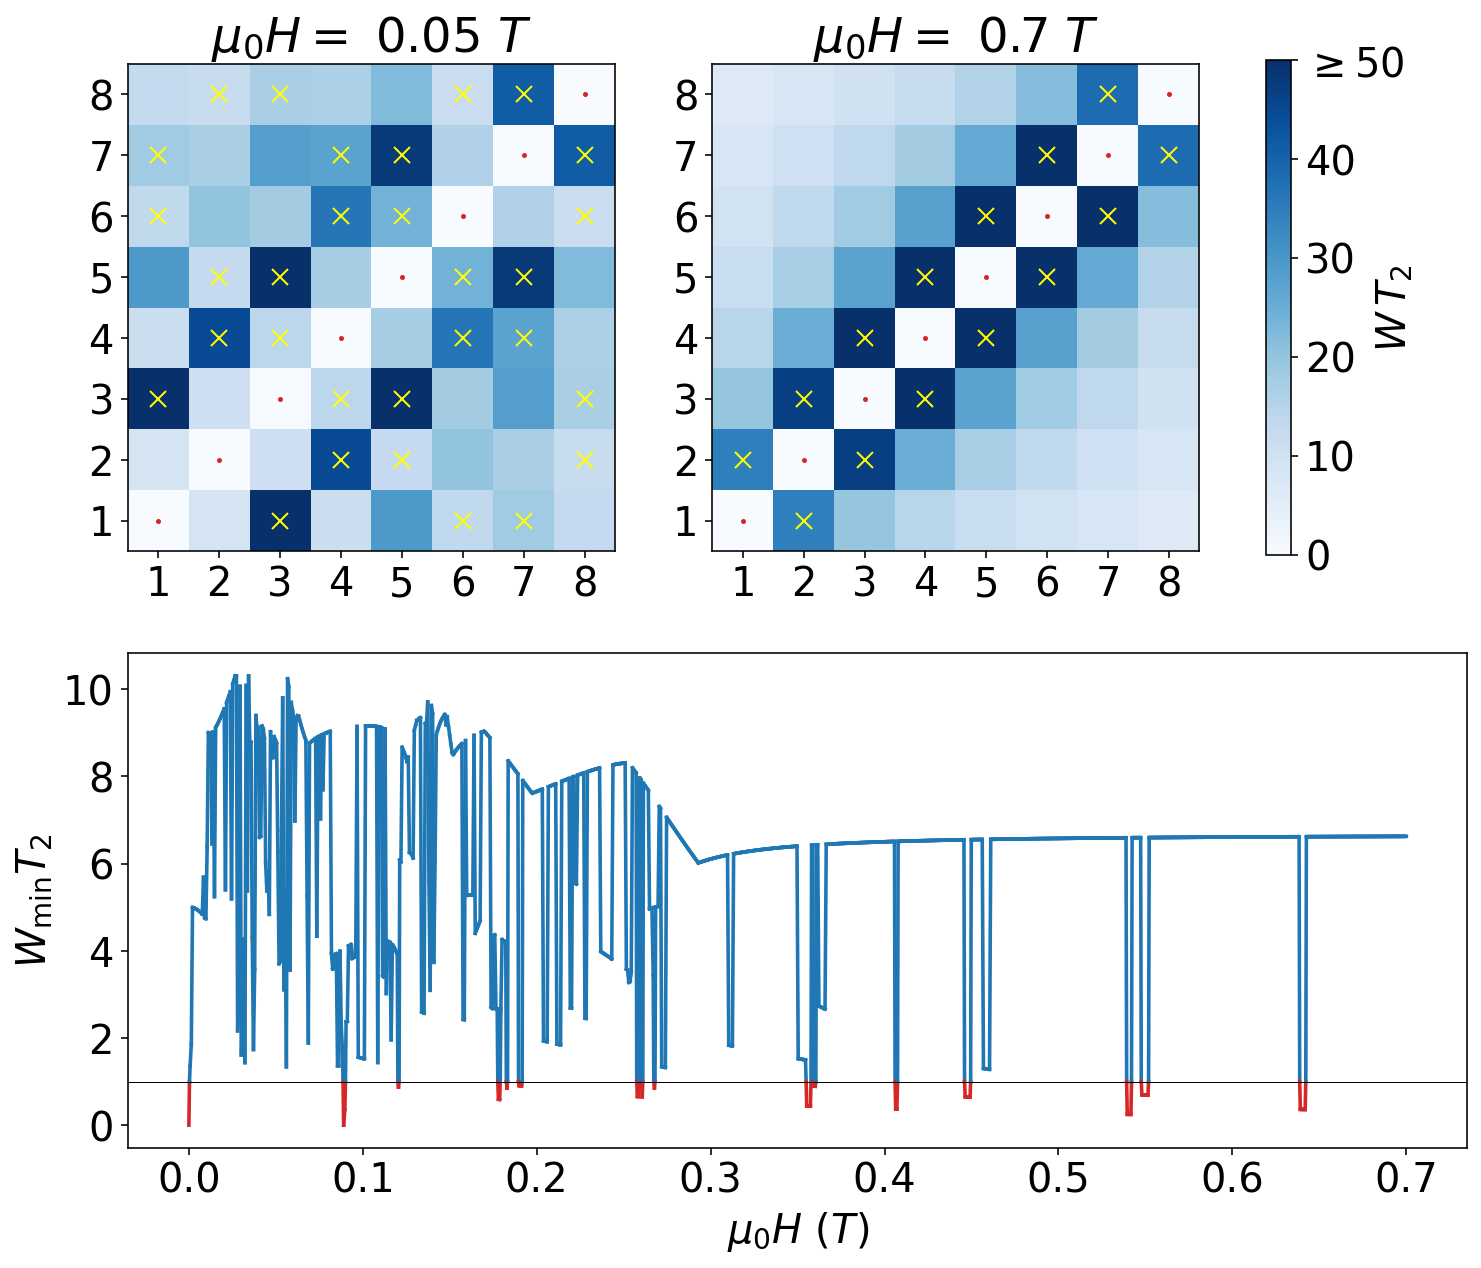

In [10]:
plt.rcParams['figure.figsize'] = 12, 10
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['font.size'] = 20

fig = plt.figure()
ax1 = fig.add_subplot(221)

# left  upper plot

h = 0.05

h_intrinsic = -h * np.array([0, 0, 1])
GdW30 = hamiltonian.SpinMonomer(S, g, h_intrinsic, A, shift)
H = GdW30.H
Hext = GdW30.external_field(h_ext)

m, energies = transition.transition_matrix(H, Hext)
m_trans, degenerates = transition.select_transitions(m, energies)
m_trans_ext = transition.fill_connections(m_trans, order = 5)
m_trans_purged = transition.apply_cutoff(m_trans_ext, th)

im = ax1.imshow(m_trans_purged / th, cmap='Blues', origin = 'lower')
im.set_clim(0, 50)

for idx, val in np.ndenumerate(m_trans_purged):
    if val == 0.0:
        ax1.plot(idx[0], idx[1], marker = 'o', lw = 0, color="tab:red", ms = 1.5)
        
for idx, val in np.ndenumerate(transition.apply_cutoff(m_trans, th)):
    if val != 0.0 and idx[0] != idx[1]: # if the value has not changed it means that the original transition is the best option
        ax1.plot(idx[0], idx[1], marker = 'x', lw = 0, color="yellow", ms = 8)
        
"""for idx in degenerates:
    axes[0].plot(idx[0], idx[1], marker = 'o', lw = 0, color="orange", ms = 7.5)"""
        
ax1.set_xticks(np.arange(0, m.shape[1], 1))
ax1.set_xticklabels(np.arange(1, m.shape[1] + 1, 1))
ax1.set_yticks(np.arange(0, m.shape[1], 1))
ax1.set_yticklabels(np.arange(1, m.shape[1] + 1, 1))

ax1.set_title(r'$\mu_0 H = $ ' + str(h) + r' $T$')

# left lower plot

ax2 = fig.add_subplot(222)

h = 0.7

h_intrinsic = -h * np.array([0, 0, 1])
GdW30 = hamiltonian.SpinMonomer(S, g, h_intrinsic, A, shift)
H = GdW30.H
Hext = GdW30.external_field(h_ext)

m, energies = transition.transition_matrix(H, Hext)
m_trans, degenerates = transition.select_transitions(m, energies)
m_trans_ext = transition.fill_connections(m_trans, order = 5)
m_trans_purged = transition.apply_cutoff(m_trans_ext, th)

im = ax2.imshow(m_trans_purged / th, cmap='Blues', origin='lower')
im.set_clim(0, 50)

for idx, val in np.ndenumerate(m_trans_purged):
    if val == 0.0:
        ax2.plot(idx[0], idx[1], marker = 'o', lw = 0, color="tab:red", ms = 1.5)
        
for idx, val in np.ndenumerate(transition.apply_cutoff(m_trans, th)):
    if val != 0.0 and idx[0] != idx[1]: # if the value has not changed it means that the original transition is the best option
        ax2.plot(idx[0], idx[1], marker = 'x', lw = 0, color="yellow", ms = 8)
        
"""for idx in degenerates:
    axes[1].plot(idx[0], idx[1], marker = 'o', lw = 0, color="orange", ms = 7.5)"""
        
ax2.set_xticks(np.arange(0, m.shape[1], 1))
ax2.set_xticklabels(np.arange(1, m.shape[1] + 1, 1))
ax2.set_yticks(np.arange(0, m.shape[1], 1))
ax2.set_yticklabels(np.arange(1, m.shape[1] + 1, 1))

ax2.set_title(r'$\mu_0 H = $ ' + str(h) + r' $T$')



"""
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(axes[1])
cax = divider.append_axes("right", size="3%", pad=0.15)"""

# Create an axes for colorbar. The position of the axes is calculated based on the position of ax.
# You can change 0.01 to adjust the distance between the main image and the colorbar.
# You can change 0.02 to adjust the width of the colorbar.
# This practice is universal for both subplots and GeoAxes.

#cax = fig.add_axes([ax2.get_position().x1+0.03, ax2.get_position().y0, 0.015, ax2.get_position().height])

ticks_labels = [str(round(n, 2)) for n in (np.arange(0, 51, 10))]
ticks_labels[-1] = r'$\geq$' + str(50)
cbar = fig.colorbar(im, ax = [ax1, ax2], aspect = 20)
cbar.set_label(r'$W \, T_2$', labelpad = -15)
cbar.ax.set_yticklabels(ticks_labels)

# right plot

ax3 = fig.add_subplot(212)

hs = np.linspace(0.0, 0.7, 1000)

universality = []

for h in hs:
    h_intrinsic = -h * np.array([0, 0, 1])
    GdW30 = hamiltonian.SpinMonomer(S, g, h_intrinsic, A, shift)
    H = GdW30.H
    Hext = GdW30.external_field(h_ext)

    m, energies = transition.transition_matrix(H, Hext)
    m_trans, degenerates = transition.select_transitions(m, energies)
    m_trans_ext = transition.fill_connections(m_trans, order = 5)
    m_trans_purged = transition.apply_cutoff(m_trans_ext, th)
    universality.append(transition.universality_measure(m_trans_ext) / th)
    
for x1, x2, y1,y2 in zip(hs, hs[1:], universality, universality[1:]):
    if y1 < 1 and y2 < 1:
        ax3.plot([x1, x2], [y1, y2], 'tab:red')
        
    elif y1 >= 1 and y2 >= 1:
        ax3.plot([x1, x2], [y1, y2], 'tab:blue')
        
    elif y1 < 1 and y2 >= 1:
        ax3.plot([x1, (x2 + x1) / 2], [y1, 1], 'tab:red')
        ax3.plot([(x2 + x1) / 2, x2], [1, y2], 'tab:blue')
        
    else:
        ax3.plot([x1, (x2 + x1) / 2], [y1, 1], 'tab:blue')
        ax3.plot([(x2 + x1) / 2, x2], [1, y2], 'tab:red')

ax3.axhline(1, lw = 0.5, c = 'k')
#ax3.axvline(0.09875, lw = 0.5, c = 'k')
#ax3.axvline(0.0975, lw = 0.5, c = 'k')
ax3.set_xlabel(r'$\mu_0 H \ (T)$')
ax3.set_ylabel(r'$W_{\rm min} T_2$')

plt.savefig('universality_GdW30.jpeg', dpi = 200, bbox_inches = 'tight')
plt.show()